# Explore HLA expression for putative Neanderthal-derived HLA types

This code first calculates the number of individuals in the Fairfax *et al.* (2014) dataset with at least one allele of each HLA type, then plots the HLA gene expression for putative Neanderthal-derived HLA types. For HLA-C\*07:02, t-tests were performed to check if number of HLA-C\*07:02 alleles altered expression of *HLA-C* or *KIR2DL3* (HLA-C ligand). We also checked for enrichment of the KIR2DL2 or KIR2DL3 in individuals with the HLA-C\*07:02.

Putative Neanderthal-derived HLA types reported in the literature include: 
* HLA-A\*02
* HLA-A\*26/66
* HLA-B\*07 (HLA-B\*07:02/03/06) 
* HLA-B\*51 (HLA-B\*51:01/08)
* HLA-C\*07:02 
* HLA-C\*16:02
* HLA-DPB1\*04:01

HLA types of individuals from:
* Fairfax BP *et al.* Innate immune activity conditions the effect of regulatory variants upon monocyte gene expression. *Science* 2014 **343**:1246949.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

### Get HLA types of samples in Fairfax dataset

In [2]:
# Get number of individuals for each HLA type (2 digits)
hla_types_2d = {}
for hla in ['A', 'B', 'C', 'DQA', 'DQB', 'DRB']:
    info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'HLA-2d_KIR_types', skiprows=2, usecols=[hla + '1', hla + '2'])
    info.dropna(how='all', inplace=True)
    types = []
    for a1, a2 in zip(info[hla + '1'], info[hla + '2']):
        if a1 == a2:
            types.append(a1)
        else:
            if isinstance(a1, str):
                types.append(a1)
            if isinstance(a2, str):
                types.append(a2)
    hla_types_2d[hla] = {x: types.count(x) for x in types}
    hla_types_2d[hla] = sorted(hla_types_2d[hla].items(), key=lambda x: x[1], reverse=True)

hla_types_2d

{'A': [('A_02', 196),
  ('A_03', 132),
  ('A_01', 114),
  ('A_24', 80),
  ('A_68', 50),
  ('A_11', 48),
  ('A_29', 32),
  ('A_31', 26),
  ('A_25', 13)],
 'B': [('B_44', 122),
  ('B_07', 104),
  ('B_08', 78),
  ('B_15', 72),
  ('B_51', 54),
  ('B_40', 45),
  ('B_57', 38),
  ('B_18', 38),
  ('B_35', 36),
  ('B_14', 28)],
 'C': [('C_07', 231),
  ('C_03', 131),
  ('C_05', 113),
  ('C_06', 74),
  ('C_04', 66),
  ('C_16', 36),
  ('C_02', 32),
  ('C_12', 30),
  ('C_15', 13),
  ('C_01', 2)],
 'DQA': [('DQA1_01', 282),
  ('DQA1_05', 156),
  ('DQA1_03', 136),
  ('DQA1_02', 111),
  ('DQA1_04', 19)],
 'DQB': [('DQB1_03', 213),
  ('DQB1_06', 132),
  ('DQB1_02', 108),
  ('DQB1_05', 99),
  ('DQB1_04', 19)],
 'DRB': [('DRB1_04', 125),
  ('DRB1_01', 112),
  ('DRB1_07', 110),
  ('DRB1_15', 91),
  ('DRB1_03', 89),
  ('DRB1_13', 80),
  ('DRB1_11', 70),
  ('DRB1_08', 18),
  ('DRB1_14', 15)]}

In [3]:
# Get number of individuals for each HLA type (4 digits)
hla_types_4d = {}
for hla in ['A', 'B', 'C', 'DQA', 'DQB', 'DRB']:
    info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'HLA-4d_KIR_types', skiprows=2, usecols=[hla + '1', hla + '2'])
    info.dropna(how='all', inplace=True)
    types = []
    for a1, a2 in zip(info[hla + '1'], info[hla + '2']):
        if a1 == a2:
            types.append(a1)
        else:
            if isinstance(a1, str):
                types.append(a1)
            if isinstance(a2, str):
                types.append(a2)
    hla_types_4d[hla] = {x: types.count(x) for x in types}
    hla_types_4d[hla] = sorted(hla_types_4d[hla].items(), key=lambda x: x[1], reverse=True)

hla_types_4d

{'A': [('A_0201', 206),
  ('A_0301', 132),
  ('A_0101', 114),
  ('A_2402', 80),
  ('A_6801', 50),
  ('A_1101', 48),
  ('A_2902', 32),
  ('A_3101', 26),
  ('A_2501', 15)],
 'B': [('B_0702', 104),
  ('B_4402', 82),
  ('B_0801', 78),
  ('B_1501', 72),
  ('B_5101', 54),
  ('B_4001', 50),
  ('B_4403', 48),
  ('B_5701', 38),
  ('B_1801', 38),
  ('B_3501', 35),
  ('B_4002', 1)],
 'C': [('C_0701', 119),
  ('C_0702', 117),
  ('C_0501', 113),
  ('C_0602', 74),
  ('C_0401', 66),
  ('C_0304', 66),
  ('C_0303', 66),
  ('C_1601', 36),
  ('C_0202', 32),
  ('C_1203', 30),
  ('C_0704', 18),
  ('C_1502', 13),
  ('C_0102', 2)],
 'DQA': [('DQA1_0501', 156),
  ('DQA1_0301', 136),
  ('DQA1_0101', 125),
  ('DQA1_0201', 111),
  ('DQA1_0102', 103),
  ('DQA1_0103', 74),
  ('DQA1_0401', 19)],
 'DQB': [('DQB1_0301', 130),
  ('DQB1_0602', 98),
  ('DQB1_0501', 89),
  ('DQB1_0302', 69),
  ('DQB1_0201', 64),
  ('DQB1_0303', 43),
  ('DQB1_0202', 42),
  ('DQB1_0603', 27),
  ('DQB1_0402', 19),
  ('DQB1_0503', 14)],
 'DR

---

### Plot HLA gene expression for Neanderthal-derived HLA types

In [4]:
# Load expression data
expr_Naive = pd.read_csv('all_expression_CD14.csv', index_col=0)
expr_IFN = pd.read_csv('all_expression_IFN.csv', index_col=0)
expr_LPS2 = pd.read_csv('all_expression_LPS2.csv', index_col=0)
expr_LPS24 = pd.read_csv('all_expression_LPS24.csv', index_col=0)

In [5]:
# Load metadata
f = open('HumanHT-12_V4_0_R2_15002873_B').read().splitlines()
probes = False
header = True
expr_info_all_dict = {}
for i, line in enumerate(f):
    if '[Controls]' == line.rstrip():
        probes = False

    elif probes:
        temp = line.split('\t')
        if header:
            header = False

        elif (temp[14] != '') and (temp[18] != '') and (temp[20] != ''):

            tict = {}
            chrom = temp[18].split('|')
            if chrom[0] != 'Un':
                chr = chrom[0].split('_')
                tict['chrom'] = chr[0]
            else:
                tict['chrom'] = '3'
            coord = temp[20].split(' ')
            pos = coord[0].split(':')
            start_end = pos[0].split('-')
            tict['start'] = int(start_end[0])
            tict['end'] = int(start_end[1])
            tict['Symbol'] = temp[11]
            tict['ILMN_Gene'] = temp[3]
            tict['ILMN_Protein'] = temp[13]

            expr_info_all_dict[int(temp[14])] = tict

    elif '[Probes]' == line.rstrip():
        probes = True

expr_info_all = pd.DataFrame(expr_info_all_dict)
expr_info_all = expr_info_all.T

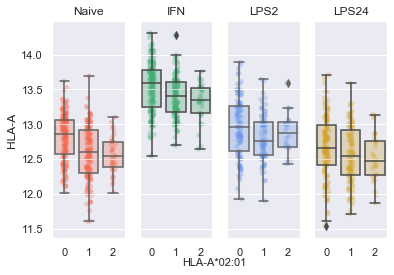

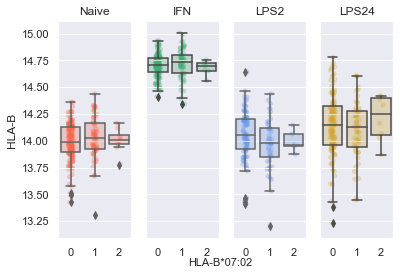

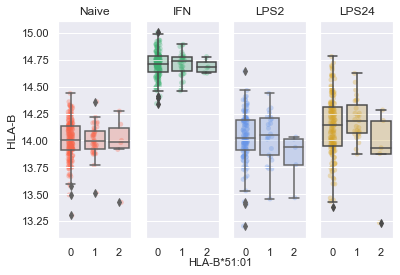

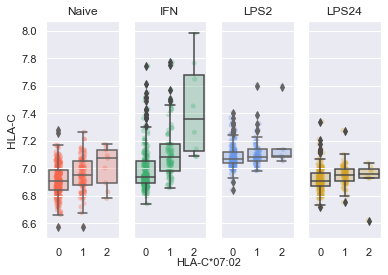

In [6]:
# Expression plots
for type, hla in [('HLA-A*02:01', 'HLA-A'), ('HLA-B*07:02', 'HLA-B'), ('HLA-B*51:01', 'HLA-B'), ('HLA-C*07:02', 'HLA-C')]:
    
    # Categorise sample ids by number of HLA alleles
    hla_info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'HLA-4d_KIR_types', skiprows=2, usecols=['Sample', hla[-1] + '1', hla[-1] + '2'])
    hla_info.dropna(inplace=True)
    samples = {'0': [], '1': [], '2': []}
    for sample, a1, a2 in zip(hla_info['Sample'], hla_info[hla[-1] + '1'], hla_info[hla[-1] + '2']):
        temp = type[4] + '_' + type[6:8] + type[9:]
        if a1 == temp and a2 == temp:
            samples['2'].append(str(sample))
        elif a1 != temp and a2 != temp:
            samples['0'].append(str(sample))
        else:
            samples['1'].append(str(sample))

    # Gene's array address
    array_address = expr_info_all[expr_info_all.Symbol == hla].index.values[0]  # 2350066 or 3400438

    # Cross expression of gene with each combination of alleles
    expr_naive = {}
    expr_ifn = {}
    expr_lps2h = {}
    expr_lps24h = {}
    for geno in samples:
        temp_naive = []
        temp_ifn = []
        temp_lps2h = []
        temp_lps24h = []
        for samp in samples[geno]:
            if samp in expr_Naive.columns.values:
                temp_naive.append(expr_Naive.loc[array_address, samp])
            if samp in expr_IFN.columns.values:
                temp_ifn.append(expr_IFN.loc[array_address, samp])
            if samp in expr_LPS2.columns.values:
                temp_lps2h.append(expr_LPS2.loc[array_address, samp])
            if samp in expr_LPS24.columns.values:
                temp_lps24h.append(expr_LPS24.loc[array_address, samp])
        expr_naive[geno] = temp_naive
        expr_ifn[geno] = temp_ifn
        expr_lps2h[geno] = temp_lps2h
        expr_lps24h[geno] = temp_lps24h

    # Build dataframe
    naive_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_naive.items() if len(v) > 0]))
    naive_df = pd.melt(naive_df, var_name=type, value_name=hla)
    naive_df['Context'] = 'Naive'
    ifn_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_ifn.items() if len(v) > 0]))
    ifn_df = pd.melt(ifn_df, var_name=type, value_name=hla)
    ifn_df['Context'] = 'IFN'
    lps2h_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_lps2h.items() if len(v) > 0]))
    lps2h_df = pd.melt(lps2h_df, var_name=type, value_name=hla)
    lps2h_df['Context'] = 'LPS2'
    lps24h_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_lps24h.items() if len(v) > 0]))
    lps24h_df = pd.melt(lps24h_df, var_name=type, value_name=hla)
    lps24h_df['Context'] = 'LPS24'
    exp_df = pd.concat([naive_df, ifn_df, lps2h_df, lps24h_df])
    exp_df = exp_df.dropna()

    # Plot
    colors = ['tomato', 'mediumseagreen', 'cornflowerblue', 'goldenrod']
    context = ['Naive', 'IFN', 'LPS2', 'LPS24']
    order = ['0', '1', '2']
    fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True)
    for ax in axes:
        i = list(axes).index(ax)
        grp = context[i]
        f = sns.stripplot(x=type, y=hla, data=exp_df[exp_df['Context'] == grp], ax=ax, color=colors[i], alpha=0.3, zorder=0, order=order)
        g = sns.boxplot(x=type, y=hla, data=exp_df[exp_df['Context'] == grp], ax=ax, color=colors[i], order=order)
        for patch in g.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, .3))
        ax.set_title(grp)
        ax.set_xlabel('')
        if i > 0:
            ax.set_ylabel('')
    fig.text(0.5, 0.04, type, ha='center', va='center', fontsize=11) # Add overall x-axis label
    plt.show()

---

### Perform t-test for HLA-C\*07:02 & HLA-C

In [7]:
for context in ['Naive', 'IFN', 'LPS2', 'LPS24']:
    data = exp_df[exp_df['Context'] == context]
    t, p = stats.ttest_ind(data[data['HLA-C*07:02'] == '0']['HLA-C'], data[data['HLA-C*07:02'] == '1']['HLA-C'], nan_policy='omit')  # p=0.003
    print(context + '\n0 vs 1: t=' + str(t) + ', p=' + str(p))
    t, p = stats.ttest_ind(data[data['HLA-C*07:02'] == '1']['HLA-C'], data[data['HLA-C*07:02'] == '2']['HLA-C'], nan_policy='omit')  # p=0.180
    print('1 vs 2: t=' + str(t) + ', p=' + str(p) + '\n')

Naive
0 vs 1: t=-2.972458969953906, p=0.0031655515684823484
1 vs 2: t=-1.350192966370788, p=0.1799720214652295

IFN
0 vs 1: t=-5.769602240659475, p=1.9729327695386762e-08
1 vs 2: t=-3.908001622482463, p=0.00018498070178650004

LPS2
0 vs 1: t=-1.4447980734402162, p=0.14997723593583737
1 vs 2: t=-1.5974076716670778, p=0.11481185338007505

LPS24
0 vs 1: t=-2.8584601444019166, p=0.004590104682932103
1 vs 2: t=0.779218305714625, p=0.43815013962049565



---

### Check for enrichment of KIR2DL2/3 in individuals with HLA-C\*07:02

In [8]:
hla_info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'HLA-4d_KIR_types', skiprows=2, usecols=['Sample', 'C1', 'C2'])
kir_info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'Imp_KIR_Types', usecols=['Sample', '2DL3', '2DL2'])
merge = hla_info.merge(kir_info, how='left', on='Sample')
count_2DL2 = 0
count_2DL3 = 0
for index, row in merge.iterrows():
    if row['C1'] == 'C_0702' or row['C2'] == 'C_0702':
        if row['2DL2'] == 1:
            count_2DL2 += 1
        if row['2DL3'] == 1:
            count_2DL3 += 1

In [9]:
# KIR2DL2
stats.fisher_exact([[68, 138], [49, 177]])

(1.779946761313221, 0.009281182149704189)

In [10]:
# KIR2DL3
stats.fisher_exact([[104, 289], [13, 26]])

(0.7197231833910035, 0.3503999905190735)

---

### Plot KIR2DL3 expression for HLA-C\*07:02

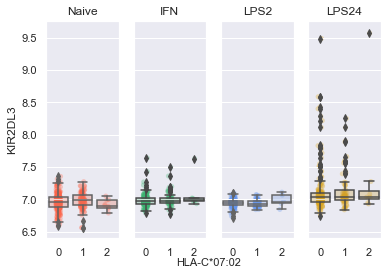

In [11]:
hla, gene = 'HLA-C*07:02', 'KIR2DL3' 

# Categorise sample ids by number of HLA alleles
hla_info = pd.read_excel('Extreme-Response_HLA_KIR-Types.xlsx', 'HLA-4d_KIR_types', skiprows=2, usecols=['Sample', 'C1', 'C2'])
hla_info.dropna(inplace=True)
samples = {'0': [], '1': [], '2': []}
for sample, a1, a2 in zip(hla_info['Sample'], hla_info['C1'], hla_info['C2']):
    temp = hla[4] + '_' + hla[6:8] + hla[9:]
    if a1 == temp and a2 == temp:
        samples['2'].append(str(sample))
    elif a1 != temp and a2 != temp:
        samples['0'].append(str(sample))
    else:
        samples['1'].append(str(sample))

# Gene's array address
array_address = expr_info_all[expr_info_all.Symbol == gene].index.values[0]

# Cross expression of gene with each combination of alleles
expr_naive = {}
expr_ifn = {}
expr_lps2h = {}
expr_lps24h = {}
for geno in samples:
    temp_naive = []
    temp_ifn = []
    temp_lps2h = []
    temp_lps24h = []
    for samp in samples[geno]:
        if samp in expr_Naive.columns.values:
            temp_naive.append(expr_Naive.loc[array_address, samp])
        if samp in expr_IFN.columns.values:
            temp_ifn.append(expr_IFN.loc[array_address, samp])
        if samp in expr_LPS2.columns.values:
            temp_lps2h.append(expr_LPS2.loc[array_address, samp])
        if samp in expr_LPS24.columns.values:
            temp_lps24h.append(expr_LPS24.loc[array_address, samp])
    expr_naive[geno] = temp_naive
    expr_ifn[geno] = temp_ifn
    expr_lps2h[geno] = temp_lps2h
    expr_lps24h[geno] = temp_lps24h

# Build dataframe
naive_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_naive.items() if len(v) > 0]))
naive_df = pd.melt(naive_df, var_name=hla, value_name=gene)
naive_df['Context'] = 'Naive'
ifn_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_ifn.items() if len(v) > 0]))
ifn_df = pd.melt(ifn_df, var_name=hla, value_name=gene)
ifn_df['Context'] = 'IFN'
lps2h_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_lps2h.items() if len(v) > 0]))
lps2h_df = pd.melt(lps2h_df, var_name=hla, value_name=gene)
lps2h_df['Context'] = 'LPS2'
lps24h_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in expr_lps24h.items() if len(v) > 0]))
lps24h_df = pd.melt(lps24h_df, var_name=hla, value_name=gene)
lps24h_df['Context'] = 'LPS24'
exp_df = pd.concat([naive_df, ifn_df, lps2h_df, lps24h_df])
exp_df = exp_df.dropna()

# Plot
colors = ['tomato', 'mediumseagreen', 'cornflowerblue', 'goldenrod']
context = ['Naive', 'IFN', 'LPS2', 'LPS24']
order = ['0', '1', '2']
fig, axes = plt.subplots(ncols=4, sharex=True, sharey=True)
for ax in axes:
    i = list(axes).index(ax)
    grp = context[i]
    f = sns.stripplot(x=hla, y=gene, data=exp_df[exp_df['Context'] == grp], ax=ax, color=colors[i], alpha=0.3, zorder=0, order=order)
    g = sns.boxplot(x=hla, y=gene, data=exp_df[exp_df['Context'] == grp], ax=ax, color=colors[i], order=order)
    for patch in g.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    ax.set_title(grp)
    ax.set_xlabel('')
    if i > 0:
        ax.set_ylabel('')
fig.text(0.5, 0.04, hla, ha='center', va='center', fontsize=11)  # Add overall x-axis label
plt.show()

In [12]:
for context in ['Naive', 'IFN', 'LPS2', 'LPS24']:
    data = exp_df[exp_df['Context'] == context]
    t, p = stats.ttest_ind(data[data['HLA-C*07:02'] == '0']['KIR2DL3'], data[data['HLA-C*07:02'] == '1']['KIR2DL3'], nan_policy='omit')  # p=0.003
    print(context + '\n0 vs 1: t=' + str(t) + ', p=' + str(p))
    t, p = stats.ttest_ind(data[data['HLA-C*07:02'] == '1']['KIR2DL3'], data[data['HLA-C*07:02'] == '2']['KIR2DL3'], nan_policy='omit')  # p=0.180
    print('1 vs 2: t=' + str(t) + ', p=' + str(p) + '\n')

Naive
0 vs 1: t=-1.372918543777247, p=0.17068514879782395
1 vs 2: t=1.42809698607917, p=0.15634890635614035

IFN
0 vs 1: t=-0.87314040704094, p=0.3832825724730844
1 vs 2: t=-1.663931363502071, p=0.09976603945013905

LPS2
0 vs 1: t=-0.07469201135144375, p=0.9405295371911788
1 vs 2: t=-1.5148177486217667, p=0.13445328668600165

LPS24
0 vs 1: t=-0.32345293350379245, p=0.7466035595025728
1 vs 2: t=-1.5638099528693872, p=0.12180956407266053

